In [53]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# read data into a dataframe
data = pd.read_csv('PinotNoir.csv')
# pass to numpy
X = data.to_numpy()
# Calculate the correlation matrix using NumPy
corr_matrix = np.corrcoef(data.T)  # Transpose to treat columns as variables
# Display the correlation matrix
#print("Correlation Matrix:")
#print(corr_matrix)

# Create a heatmap of the correlation matrix
#plt.figure(figsize=(15, 15))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
#plt.title("Correlation Matrix Heatmap")
#plt.show();

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X);

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(X_scaled.T);  # Transpose to get features in columns

# Step 3: Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display results
#print("Eigenvalues of the covariance matrix:", eigenvalues)
#print("Eigenvectors of the covariance matrix:");
#print(eigenvectors);

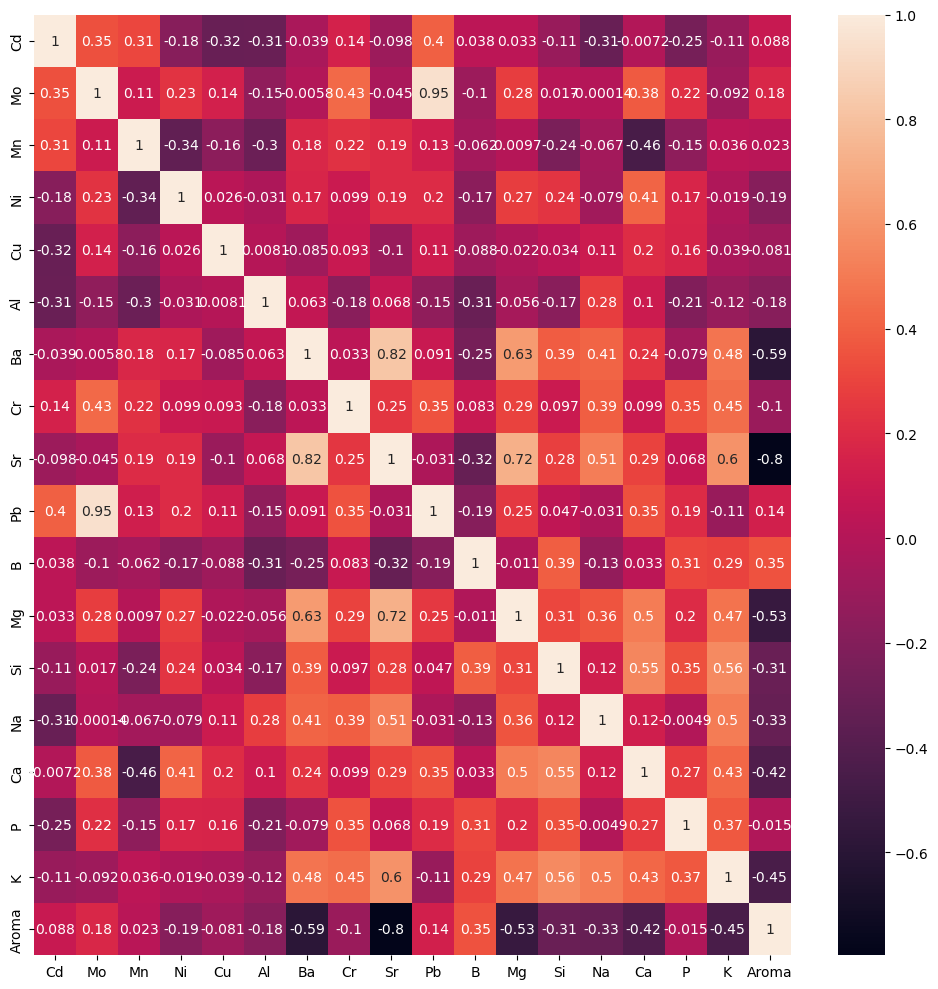

In [54]:

# Calculate the correlation matrix using numpy
corr_matrix = np.corrcoef(data.T)
# Create a heatmap of the correlation matrix

fig, ax = plt.subplots(figsize = (10, 10 ))

im = sns.heatmap(corr_matrix, xticklabels = data.columns, annot=True, yticklabels = data.columns, ax=ax)

fig.tight_layout()
plt.show()

In [55]:
eigenvalues_df = pd.DataFrame(eigenvalues, index = data.columns, columns = ['Covarriance'] )

In [56]:
eigenvectors_df = pd.DataFrame(eigenvectors, index = data.columns, columns = ['PC' + str(i + 1) for i in range(len(eigenvectors))] )

In [57]:
eigenvalues_df

,Covarriance
Cd,4.721474
Mo,2.895997
Mn,2.337862
Ni,2.081071
Cu,1.508548
Al,1.020225
Ba,0.893539
Cr,0.676170
Sr,0.617351
Pb,0.509194


In [58]:
def color_negative(v, color):
    return f"color: {color};" if abs(v) > 0.4 else None

eigenvectors_df.style.map(color_negative, color="red")

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Cd,0.060838,0.293277,-0.327331,0.154120,-0.325597,0.285317,0.183529,-0.404067,0.086999,0.001137,-0.084904,0.338318,-0.278794,0.304842,-0.300864,0.057333,0.032357,-0.016483
Mo,-0.093109,0.521095,-0.125519,-0.201445,0.098393,0.109663,0.002833,0.177019,-0.047601,0.004435,0.039398,-0.133682,0.147394,0.060356,0.186485,0.571393,0.208190,-0.398395
Mn,0.030685,0.073521,-0.452799,0.342464,0.101919,-0.277343,0.084571,0.154861,-0.173806,-0.169676,0.462091,-0.327601,0.126775,0.189487,-0.276293,0.026106,-0.119835,0.172330
Ni,-0.160565,0.112964,0.154980,-0.327462,-0.252688,-0.336551,-0.505528,-0.024948,0.385687,-0.082068,0.278554,-0.031702,-0.171160,0.313027,-0.101414,-0.002656,0.110586,0.114102
Cu,-0.036297,0.057233,0.194416,-0.231641,0.395417,-0.361208,0.651623,-0.049602,0.189345,0.107315,0.182125,0.154892,-0.228188,0.074837,-0.115568,-0.034485,0.098072,-0.060741
Al,-0.013529,-0.270525,-0.007527,-0.379469,0.173852,0.489537,-0.096921,0.012620,-0.372238,-0.126756,0.513239,0.175151,-0.158844,0.026967,-0.122807,-0.005584,0.115594,0.001452
Ba,-0.348822,-0.144827,-0.232098,0.017164,-0.164088,-0.067383,0.093580,0.439248,0.021766,-0.097811,-0.021250,0.257042,-0.451554,-0.048583,0.294177,0.204026,-0.395585,0.050439
Cr,-0.192741,0.270705,-0.070556,0.183004,0.434791,0.035901,-0.275642,-0.383636,0.235576,-0.141485,0.223081,0.216169,0.007344,-0.405732,0.097415,-0.046100,-0.296100,-0.040538
Sr,-0.397580,-0.172961,-0.230490,0.042000,-0.032837,-0.138794,-0.077387,-0.026681,-0.092445,0.061925,-0.041656,-0.017367,0.006680,0.068339,-0.085788,-0.430505,0.118454,-0.710087
Pb,-0.093438,0.502639,-0.169736,-0.213699,0.040801,0.092839,0.070241,0.229335,-0.119548,-0.135794,-0.103124,0.040290,0.030051,0.024479,0.245797,-0.605951,0.158614,0.311593


In [59]:
eigenvectors_df[['PC1', 'PC2']].style.map(color_negative, color="red")

,PC1,PC2
Cd,0.060838,0.293277
Mo,-0.093109,0.521095
Mn,0.030685,0.073521
Ni,-0.160565,0.112964
Cu,-0.036297,0.057233
Al,-0.013529,-0.270525
Ba,-0.348822,-0.144827
Cr,-0.192741,0.270705
Sr,-0.397580,-0.172961
Pb,-0.093438,0.502639


In [60]:
eigenvectors_df.loc[['Cd']]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Cd,0.060838,0.293277,-0.327331,0.15412,-0.325597,0.285317,0.183529,-0.404067,0.086999,0.001137,-0.084904,0.338318,-0.278794,0.304842,-0.300864,0.057333,0.032357,-0.016483


In [61]:
eigenvectors_df.iloc[0]

PC1     0.060838
PC2     0.293277
PC3    -0.327331
PC4     0.154120
PC5    -0.325597
PC6     0.285317
PC7     0.183529
PC8    -0.404067
PC9     0.086999
PC10    0.001137
PC11   -0.084904
PC12    0.338318
PC13   -0.278794
PC14    0.304842
PC15   -0.300864
PC16    0.057333
PC17    0.032357
PC18   -0.016483
Name: Cd, dtype: float64

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x,y)
text = eigenvalues_df.index
x = eigenvectors_df['PC1']
y = eigenvectors_df['PC2']
for i in range(len(x)):
    if  i == 9:
        ax.annotate(text[i], (x.iloc[i], y.iloc[i] + 0.01), verticalalignment='top')
    else:
        ax.annotate(text[i], (x.iloc[i], y.iloc[i]), verticalalignment='bottom')


plt.title("PCA: Eigenvectors (Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
  
# adjusting the scale of the axes 
plt.show()       

In [107]:
def eigenvectors_scatter(eigenvalues_df, eigenvectors_df):
    x = eigenvectors_df['PC1']
    y = eigenvectors_df['PC2']
    text = eigenvalues_df.index
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    

    for i in range(len(x)):
        if  i == 9:
            ax.annotate(text[i], (x.iloc[i], y.iloc[i] + 0.01), verticalalignment='top')
        else:
            ax.annotate(text[i], (x.iloc[i], y.iloc[i]), verticalalignment='bottom')
    
    
    plt.title("PCA: Eigenvectors (Principal Components)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
      
    # adjusting the scale of the axes 
    plt.show()        

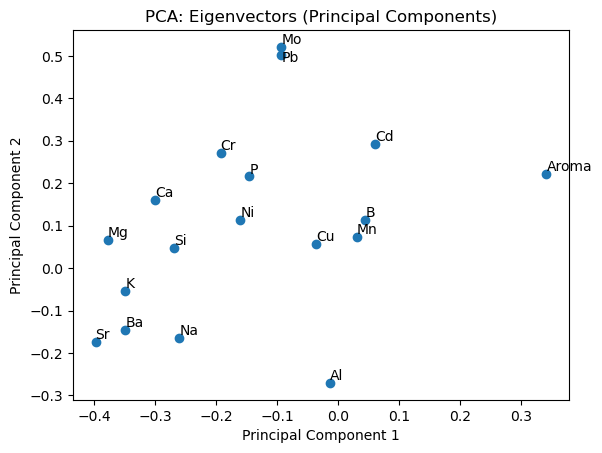

In [108]:
eigenvectors_scatter(eigenvalues_df, eigenvectors_df)

In [86]:
for i in text:
    if i in ('Pb', 'Mo', 'Mn'):
        print(text.get_loc(i))

1
2
9


In [95]:
eigenvectors[0]

array([ 0.06083829,  0.2932774 , -0.32733054,  0.15412002, -0.32559709,
        0.28531681,  0.1835289 , -0.40406677,  0.08699929,  0.00113651,
       -0.08490423,  0.33831774, -0.27879364,  0.30484152, -0.30086384,
        0.05733335,  0.03235664, -0.01648312])

In [96]:
eigenvectors[1]

array([-0.09310877,  0.5210953 , -0.12551881, -0.20144475,  0.098393  ,
        0.10966341,  0.00283309,  0.1770194 , -0.04760057,  0.00443504,
        0.03939837, -0.13368155,  0.14739387,  0.06035614,  0.18648465,
        0.57139323,  0.20819006, -0.39839453])

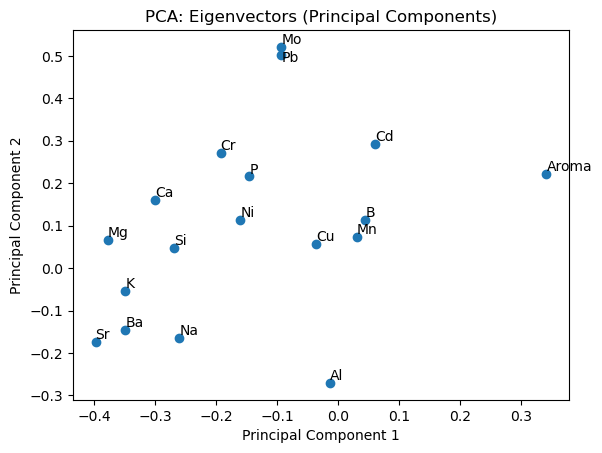

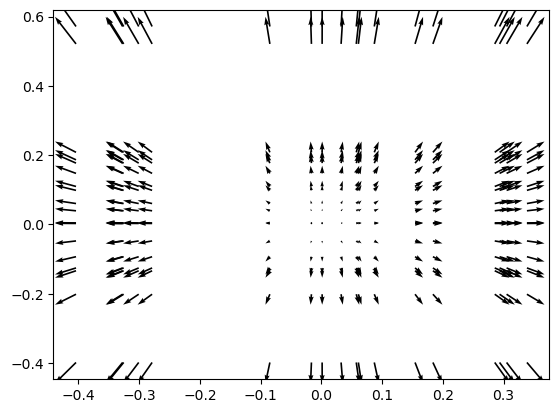

In [109]:
x = eigenvectors[0]
y = eigenvectors[1]
u, v = np.meshgrid(x, y)
plt.quiver(x, y, u, v)
eigenvectors_scatter(eigenvalues_df, eigenvectors_df)

In [ ]:
u, v = np.meshgrid(x, y)
n = eigenvectors_df.index
q = ax.quiver(X, Y, U, V)

#ax.quiverkey(q, x, y, u, v)
#ax.quiverkey(q, X = 0.3, Y = 1.1, U = 10,
#             label='Quiver key, length = 10', labelpos='E')
#ax.scatter(x, y)


In [81]:
vars(data.columns)

{'_data': array(['Cd', 'Mo', 'Mn', 'Ni', 'Cu', 'Al', 'Ba', 'Cr', 'Sr', 'Pb', 'B',
        'Mg', 'Si', 'Na', 'Ca', 'P', 'K', 'Aroma'], dtype=object),
 '_name': None,
 '_cache': {},
 '_id': <object at 0x20f60cc4260>,
 '_references': <pandas._libs.internals.BlockValuesRefs at 0x20f59f4ec50>}

In [18]:
vars(data.columns)['_data'][0]

'Cd'

In [ ]:
# Plotting the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')

# Add labels and title
plt.title("Scree Plot of Eigenvalues")
plt.xlabel("Principal Component Index")
plt.ylabel("Eigenvalue")

# Display the plot
plt.show()

In [ ]:
# Step 1: Calculate the covariance matrix
cov_matrix = np.cov(X.T)

# Step 2: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Visualize the eigenvectors
plt.figure(figsize=(8, 6))

# Plot the data points (optional, for context)
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data')

# Plot eigenvectors
for i in range(len(eigenvalues)):
    eigenvector = eigenvectors[:, i]
    plt.quiver(0, 0, eigenvector[0], eigenvector[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'Eigenvector {i+1}' if i == 0 else "")

# Add labels and title
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title("Eigenvectors of the Covariance Matrix")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Step 1: Perform PCA to get the principal components (eigenvectors)
pca = PCA(n_components=2)  # We reduce it to 2D for visualization
X_pca = pca.fit_transform(X)

# Step 2: Visualize the principal components (eigenvectors)
plt.figure(figsize=(8, 6))

# Plot the transformed data points in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', label='Transformed Data')

# Plot the eigenvectors (principal components) as arrows
for i in range(2):
    eigenvector = pca.components_[i]
    plt.quiver(0, 0, eigenvector[0], eigenvector[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'PC {i+1}' if i == 0 else "")

# Add labels and title
plt.title("PCA: Eigenvectors (Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

# Display the plot
plt.show()